In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('placement.csv')

In [50]:
print(df.shape)
df.head()

(100, 3)


,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa', ylabel='resume_score'>

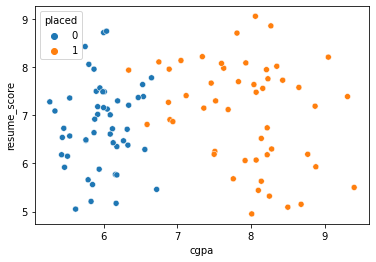

In [47]:
sns.scatterplot(df['cgpa'],df['resume_score'],hue=df['placed'])

In [51]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [52]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [53]:
p.fit(X,y)

Perceptron()

In [54]:
p.coef_

array([[ 40.26, -36.  ]])

In [42]:
p.intercept_

array([-25.])

In [43]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

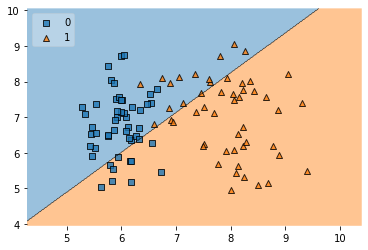

In [45]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)

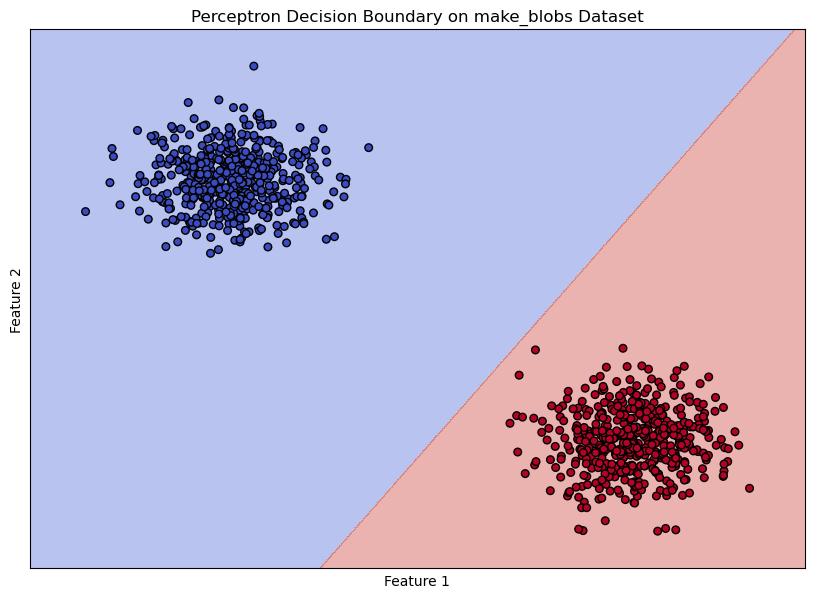


--- Perceptron Model Details ---
Number of iterations to converge: 7
Perceptron accuracy on test set: 1.0000
Coefficients (weights): [[ 9.17541892 -5.37695676]]
Intercept (bias): [1.]

--- Visual Explanation ---
This visualization demonstrates the decision boundary of a simple Perceptron classifier on a `make_blobs` dataset.
1.  **Data Points:** You can see two distinct clusters of data points (colored red and blue).
    The `make_blobs` function is used here to generate data that is mostly linearly separable, meaning a straight line can effectively divide the two classes.
2.  **Perceptron Decision Boundary:** The Perceptron, being a linear model, learns a single straight line (or hyperplane in higher dimensions) to separate the classes.
    The shaded regions show where the Perceptron would classify new points as one class or the other.
    Notice how the boundary is a clear, single straight line, reflecting the linear nature of the Perceptron algorithm.

**Key Takeaway:** The Percep

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron # Import the Perceptron classifier
from sklearn.datasets import make_blobs    # Dataset for linearly separable data
from sklearn.model_selection import train_test_split

# --- 1. Generate Linearly Separable Classification Data (make_blobs) ---
# make_blobs creates isotropic Gaussian blobs for clustering.
# We'll create two blobs (centers=2) that are well-separated (cluster_std=0.8)
# to make them mostly linearly separable for the Perceptron.
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=0.8, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 2. Train a Perceptron Classifier ---
# The Perceptron is a simple linear classifier.
# max_iter: The maximum number of passes over the training data (epochs).
# tol: The stopping criterion. The iteration will stop when the loss is not improving by at least tol.
# random_state: For reproducibility.
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

# --- 3. Create a Meshgrid for Plotting the Decision Boundary ---
# This creates a grid of points over the entire feature space.
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    #  np.arange(y_min, y_max, 0.02))

# Flatten the meshgrid points for prediction
Z_perceptron = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z_perceptron = Z_perceptron.reshape(xx.shape) # Reshape predictions back to grid for contour plotting

# --- 4. Visualize the Decision Boundary and Data Points ---
plt.figure(figsize=(10, 7))

# Plot the decision boundary of the Perceptron|(filled contours)
plt.contourf(xx, yy, Z_perceptron, alpha=0.4, cmap=plt.cm.coolwarm)
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.coolwarm)

plt.title('Perceptron Decision Boundary on make_blobs Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks([])
plt.yticks([])
plt.show()

# --- 5. Print out Perceptron parameters and performance ---
print("\n--- Perceptron Model Details ---")
print(f"Number of iterations to converge: {perceptron.n_iter_}")
print(f"Perceptron accuracy on test set: {perceptron.score(X_test, y_test):.4f}")
print(f"Coefficients (weights): {perceptron.coef_}")
print(f"Intercept (bias): {perceptron.intercept_}")


print("\n--- Visual Explanation ---")
print("This visualization demonstrates the decision boundary of a simple Perceptron classifier on a `make_blobs` dataset.")
print("1.  **Data Points:** You can see two distinct clusters of data points (colored red and blue).")
print("    The `make_blobs` function is used here to generate data that is mostly linearly separable, meaning a straight line can effectively divide the two classes.")
print("2.  **Perceptron Decision Boundary:** The Perceptron, being a linear model, learns a single straight line (or hyperplane in higher dimensions) to separate the classes.")
print("    The shaded regions show where the Perceptron would classify new points as one class or the other.")
print("    Notice how the boundary is a clear, single straight line, reflecting the linear nature of the Perceptron algorithm.")
print("\n**Key Takeaway:** The Perceptron is a simple yet foundational algorithm for binary classification. It performs well on linearly separable data but cannot handle non-linear relationships, unlike models like Random Forests or Gradient Boosting.")
